## **IMPORT** **LIBRARY**

In [1]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"ahmdyns","key":"5e8698640fbdd2fd12af53b05dc49312"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alessiocorrado99/animals10

100% 583M/586M [00:27<00:00, 23.7MB/s]
100% 586M/586M [00:27<00:00, 22.5MB/s]


# **MENGEKSTRAK FILE  ZIP KE FOLDER TUJUAN**

In [2]:
import zipfile

path_to_zip_file = "/content/animals10.zip"
directory_to_extract_to = "/content/animals10"  # Ganti dengan path folder tujuan ekstraksi

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)


# **MENGATUR JALUR DIREKTORI DAN MELIHAT ISI DIREKTORI**

In [3]:
import os
base_dir = '/content/animals10/raw-img'

In [4]:
print(os.listdir(base_dir))

['cavallo', 'scoiattolo', 'gallina', 'farfalla', 'mucca', 'cane', 'ragno', 'elefante', 'pecora', 'gatto']


# **MELIHAT JUMLAH GAMBAR TIAP KELAS DAN TOTAL GAMBAR DARI SEMUA KELAS**

In [5]:
kuda_dir = os.path.join(base_dir, 'cavallo/')
gajah_dir = os.path.join(base_dir, 'elefante/')
kucing_dir = os.path.join(base_dir, 'gatto/')
labalaba_dir = os.path.join(base_dir, 'ragno/')
domba_dir = os.path.join(base_dir, 'pecora/')
anjing_dir = os.path.join(base_dir, 'cane/')
kupukupu_dir = os.path.join(base_dir, 'farfalla/')
tupai_dir = os.path.join(base_dir, 'scoiattolo/')
ayam_dir = os.path.join(base_dir, 'gallina/')
sapi_dir = os.path.join(base_dir, 'mucca/')

print("Jumlah Data Dari Masing MAsing Hewan")
print('Jumlah Gambar Kuda      : ', len(os.listdir(kuda_dir)))
print('Jumlah Gambar Gajah     : ', len(os.listdir(gajah_dir)))
print('Jumlah Gambar Kucing    : ', len(os.listdir(kucing_dir)))
print('Jumlah Gambar Laba Laba : ', len(os.listdir(labalaba_dir)))
print('Jumlah Gambar Domba     : ', len(os.listdir(domba_dir)))
print('Jumlah Gambar Anjing    : ', len(os.listdir(anjing_dir)))
print('Jumlah Gambar Kupu Kupu : ', len(os.listdir(kupukupu_dir)))
print('Jumlah Gambar Tupai     : ', len(os.listdir(tupai_dir)))
print('Jumlah Gambar Ayam      : ', len(os.listdir(ayam_dir)))
print('Jumlah Gambar Sapi      : ', len(os.listdir(sapi_dir)))

number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting
print()
print("Total Gambar Pada Files : " + str(total_files))

Jumlah Data Dari Masing MAsing Hewan
Jumlah Gambar Kuda      :  2623
Jumlah Gambar Gajah     :  1446
Jumlah Gambar Kucing    :  1668
Jumlah Gambar Laba Laba :  4821
Jumlah Gambar Domba     :  1820
Jumlah Gambar Anjing    :  4863
Jumlah Gambar Kupu Kupu :  2112
Jumlah Gambar Tupai     :  1862
Jumlah Gambar Ayam      :  3098
Jumlah Gambar Sapi      :  1866

Total Gambar Pada Files : 26179


# **MEMVISUALISAIKAN SAMPLE GAMBAR DARI SETIAP KELAS**

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

# **MENGINISIALIASI VARIABEL**

In [7]:
IMAGE_SIZE = (200,200)
BATCH_SIZE = 32
SEED = 999

# **IMPORT LIBRARY**

In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# **PRE PROCESSING**

In [9]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2
)

In [10]:
train_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='training',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

valid_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='validation',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [11]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE[0],
                                  IMAGE_SIZE[1],
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Rescaling(1./255)
  ]
)

# **MEMBUAT CALLBACK YANG AKAN BERHENTI JIKA AKURASI MODEL SUDAH 99%**

In [12]:
class myCallback(tf.keras.callbacks.Callback) :
  def on_epoch(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
       print('\nAkurasi Sudah Mencapai 99%')
       self.model.stop_training = True

callbacks = myCallback()

# **MEMBUAT MODEL ARSITEKTUR CNN**

In [13]:
cnn_model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


# **MENGECEK RINGKASAN DARI ARSITEKTUR**

In [14]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)       

# **MENGCOMPILE MODEL**

In [15]:
cnn_model.compile(loss='categorical_crossentropy',
    optimizer = 'Adam',
    metrics=['accuracy']
  )

# **MELATIH MODEL DENGAN MENGGUNAKAN DATA PELATIHAN**

In [ ]:
cnn_hist = cnn_model.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
655/655 [==============================] - 105s 142ms/step - loss: 1.9436 - accuracy: 0.3080 - val_loss: 1.6953 - val_accuracy: 0.4041
Epoch 2/10
655/655 [==============================] - 82s 125ms/step - loss: 1.5065 - accuracy: 0.4794 - val_loss: 1.4973 - val_accuracy: 0.4901
Epoch 3/10
655/655 [==============================] - 84s 127ms/step - loss: 1.3302 - accuracy: 0.5465 - val_loss: 1.3904 - val_accuracy: 0.5235
Epoch 4/10
655/655 [==============================] - 83s 127ms/step - loss: 1.2191 - accuracy: 0.5856 - val_loss: 1.2233 - val_accuracy: 0.5916
Epoch 5/10
655/655 [==============================] - 83s 126ms/step - loss: 1.1294 - accuracy: 0.6165 - val_loss: 1.3260 - val_accuracy: 0.5503
Epoch 6/10
655/655 [==============================] - 81s 124ms/step - loss: 1.0688 - accuracy: 0.6366 - val_loss: 1.2060 - val_accuracy: 0.6024
Epoch 7/10
655/655 [==============================] - 83s 127ms/step - loss: 1.0207 - accuracy: 0.6557 - val_loss: 1.1759 - val_a

# **MEMBUAT PLOT AKURASI DAN LOSS**

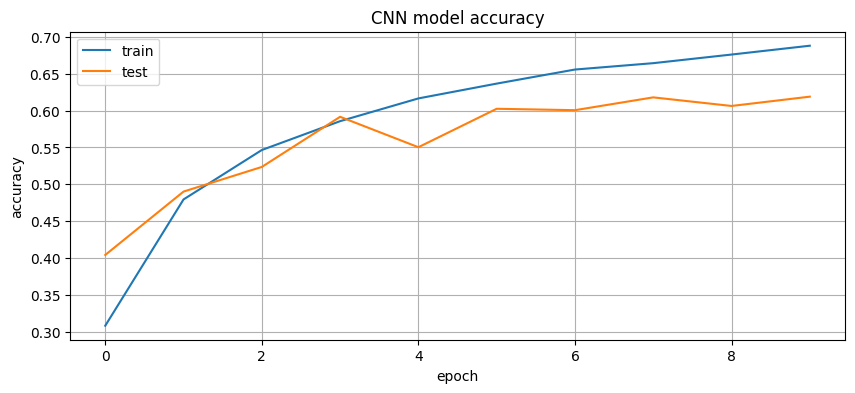

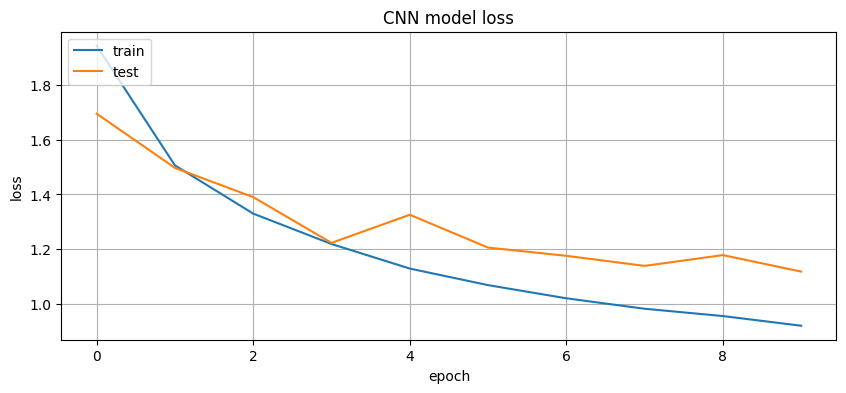

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

# **MEMBUAT DAN MELATIH MODEL VGG16**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

base_vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
base_vgg_model.trainable = False

vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
train_data.preprocessing_function = vgg_preprocess

vgg_model = tf.keras.models.Sequential([
  data_augmentation,
  base_vgg_model,
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg_hist = vgg_model.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
655/655 [==============================] - 129s 189ms/step - loss: 1.1768 - accuracy: 0.5948 - val_loss: 0.7133 - val_accuracy: 0.7571
Epoch 2/10
655/655 [==============================] - 118s 180ms/step - loss: 0.9001 - accuracy: 0.6968 - val_loss: 0.5956 - val_accuracy: 0.8049
Epoch 3/10
655/655 [==============================] - 119s 181ms/step - loss: 0.8272 - accuracy: 0.7216 - val_loss: 0.5609 - val_accuracy: 0.8163
Epoch 4/10
655/655 [==============================] - 118s 180ms/step - loss: 0.8009 - accuracy: 0.7292 - val_loss: 0.5837 - val_accuracy: 0.8043
Epoch 5/10
655/655 [==============================] - 119s 182ms/step - loss: 0.7733 - accuracy: 0.7378 - val_loss: 0.5369 - val_accuracy: 0.8186
Epoch 6/10
655/655 [==============================] - 119s 181ms/step - loss: 0.7498 - accuracy: 0.7493 - val_loss: 0.4998 - val_accuracy: 0.8385
Epoch 7/10
655/655 [==============================] - 118s 181ms/step - loss: 0.7286 - accuracy: 0.7529 - val_loss: 0.5181 -

MEMBUAT PLOT AKURASI DAN LOSS

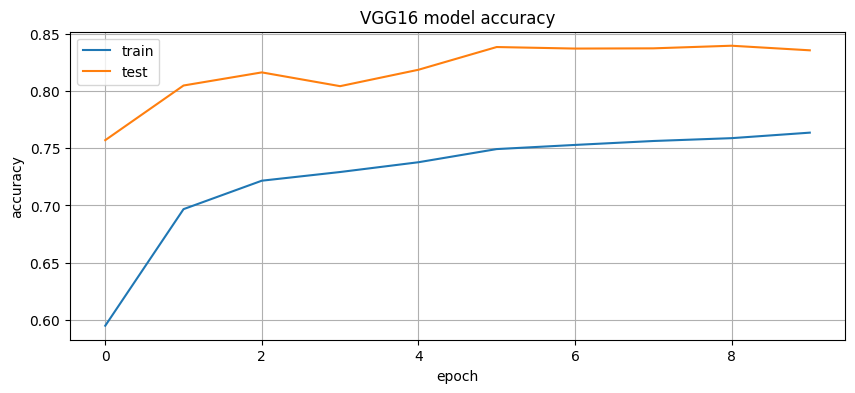

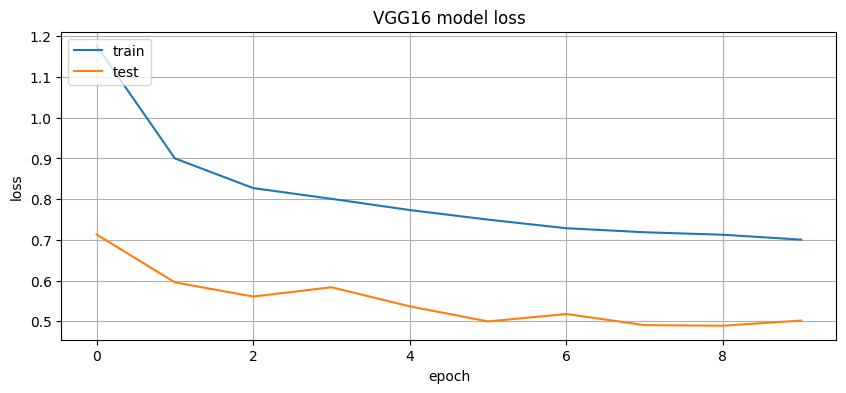

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['loss'])
plt.plot(vgg_hist.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

# **MELAKUKAN TRANSFER LEARNING MENGGUNAKAN RESNET50**

In [ ]:
from tensorflow.keras.applications import ResNet50

base_resnet_model = ResNet50(include_top=False,
                   input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3),
                   pooling='max',classes=5,
                   weights='imagenet')

base_resnet_model.trainable = False

train_data.preprocessing_function = tf.keras.applications.resnet50.preprocess_input


resnet_model = tf.keras.models.Sequential([
    data_augmentation,
    base_resnet_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
resnet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
resnet_hist = resnet_model.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['loss'])
plt.plot(resnet_hist.history['val_loss'])
plt.title('ResNet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

# **MEMBUAT PLOT AKURASI DAN LOSS KESELUHURAN MODEL**

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['val_accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', 'VGG16', 'ResNet50'], loc='lower right')
plt.grid(True)
plt.show()

# **MENAMPILKAN DATA KELAS**

In [ ]:
train_data.class_indices

# **MENGUJI MODEL**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from google.colab import files
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = vgg_model.predict(images, batch_size=BATCH_SIZE)
  classes = np.argmax(classes)

  print(fn)
  if classes == 0:
    print('Anjing')
  elif classes == 1:
    print('Kuda')
  elif classes == 2:
    print('Gajah')
  elif classes == 3:
    print('Kupu Kupu')
  elif classes == 4:
    print('Ayam')
  elif classes == 5:
    print('Kucing')
  elif classes == 6:
    print('Sapi')
  elif classes == 7:
    print('Domba')
  elif classes == 8:
    print('Laba Laba')
  else:
    print('Tupai')